In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

with open('logs_bck.pickle', 'rb') as f:
    logs = pickle.load(f)
    
epochs = list(range(1, len(logs[0]['history']['loss'])+1))

In [2]:
loss = pd.DataFrame()
for log_entry in logs:
    df_training = pd.DataFrame({
        'epoch': epochs,
        'loss': log_entry['history']['loss'],
        'type': 'training',
        'model': log_entry['model'],
        'train size': log_entry['train_size']
    })
    df_validation = pd.DataFrame({
        'epoch': epochs,
        'loss':  log_entry['history']['val_loss'],
        'type': 'validation',
        'model': log_entry['model'],
        'train size': log_entry['train_size']
    })
    loss = pd.concat([loss, df_training, df_validation])

auc = pd.DataFrame()
for log_entry in logs:
    df_training = pd.DataFrame({
        'epoch': epochs,
        'AUC': log_entry['history']['auc'],
        'type': 'training',
        'model': log_entry['model'],
        'train size': log_entry['train_size']
    })
    df_validation = pd.DataFrame({
        'epoch': epochs,
        'AUC':  log_entry['history']['val_auc'],
        'type': 'validation',
        'model': log_entry['model'],
        'train size': log_entry['train_size']
    })
    auc = pd.concat([auc, df_training, df_validation])   

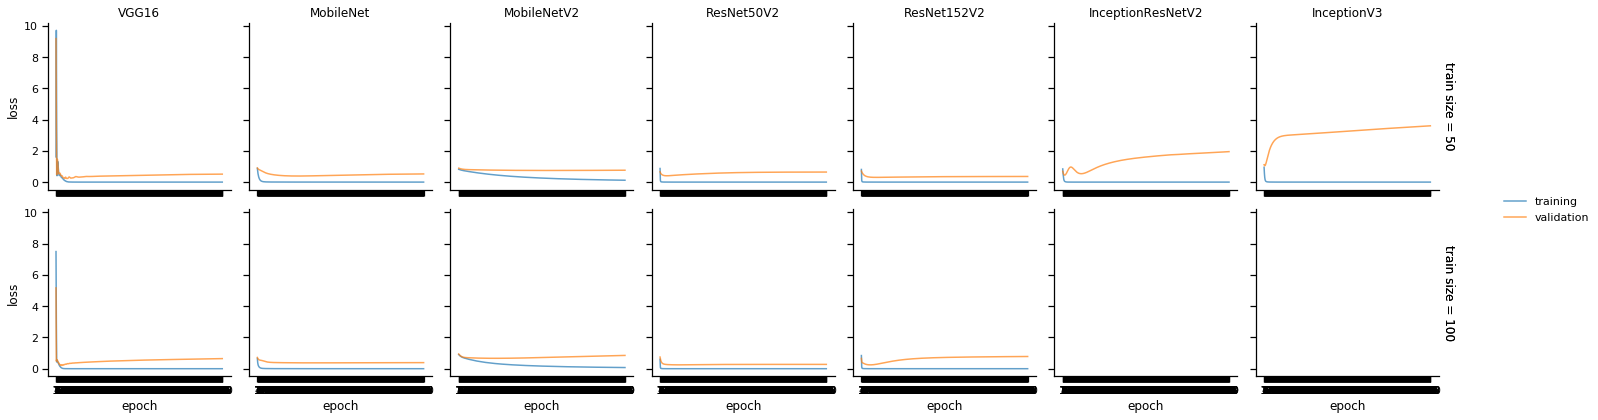

In [3]:
sns.set_context("notebook")
g = sns.FacetGrid(loss, col="model", hue='type', row='train size', margin_titles=True)
_ = g.map(sns.lineplot, "epoch", "loss", alpha=.7)
_ = g.add_legend(title='')
_ = g.set_titles(col_template="{col_name}")
_ = g.set(xticks=epochs)
#plt.savefig("loss.svg", format="svg")

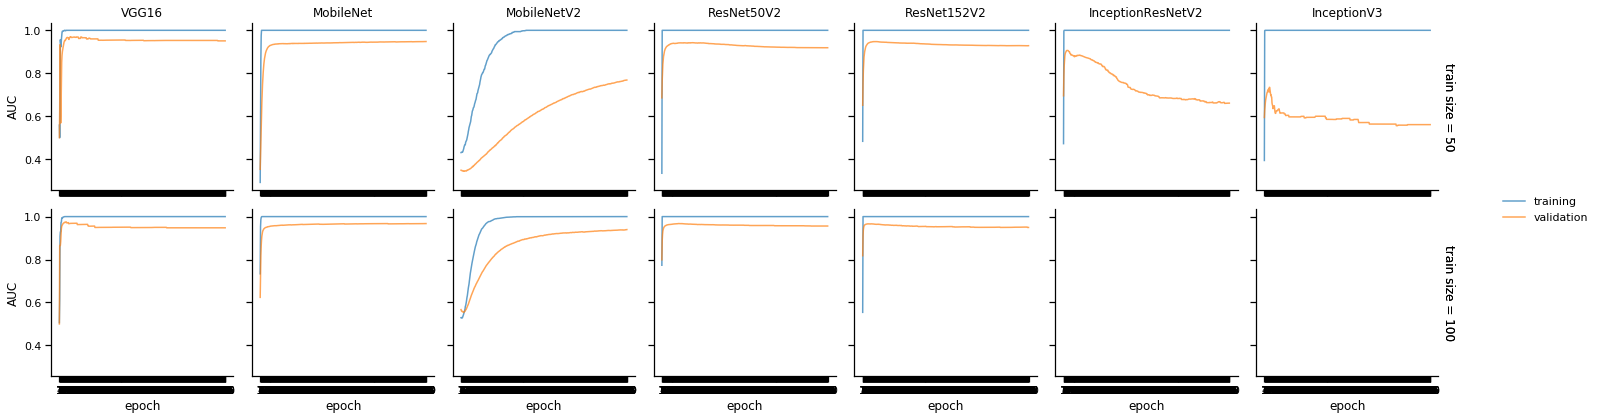

In [4]:
sns.set_context("notebook")
g = sns.FacetGrid(auc, col="model", hue='type', row='train size', margin_titles=True) #, col_wrap=3, height=4)
_ = g.map(sns.lineplot, "epoch", "AUC", alpha=.7)
_ = g.add_legend(title='')
_ = g.set_titles(col_template="{col_name}")
_ = g.set(xticks=epochs)
#plt.savefig("auc.svg", format="svg")

In [5]:
evaluation = []
for log_entry in logs:
    evaluation.append({
         'AUC': log_entry['evaluation'][log_entry['metrics'].index('auc')],
         'model': log_entry['model'],
         'train size': log_entry['train_size']
    })
    
evaluation = pd.DataFrame(evaluation)    

pd.pivot_table(evaluation, values='AUC', index=['model'], columns=['train size'])

train size,50,100
model,,
InceptionResNetV2,0.605833,NaN
InceptionV3,0.531231,NaN
MobileNet,0.927349,0.969495
MobileNetV2,0.747703,0.916991
ResNet152V2,0.893286,0.934551
ResNet50V2,0.927068,0.946474
VGG16,0.953499,0.958319


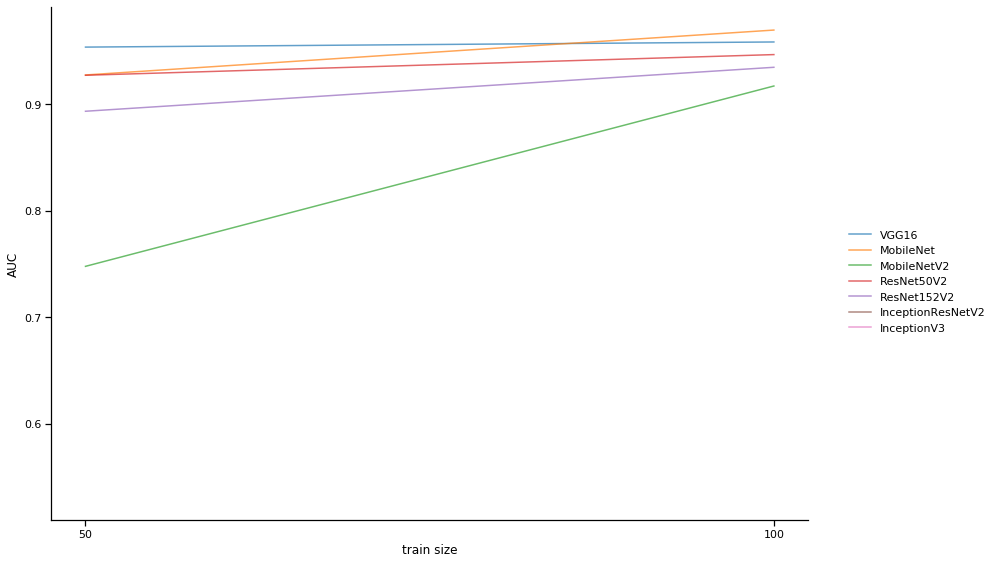

In [6]:
sns.set_context("notebook")
g = sns.FacetGrid(evaluation, hue='model', margin_titles=True, height=8, aspect=1.5)
_ = g.map(sns.lineplot, "train size", "AUC", alpha=.7)
_ = g.add_legend(title='')
_ = g.set(xticks=evaluation['train size'].unique())
#plt.savefig("evaluation.svg", format="svg")